/Users/pancake/miniconda3/envs/perturb/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


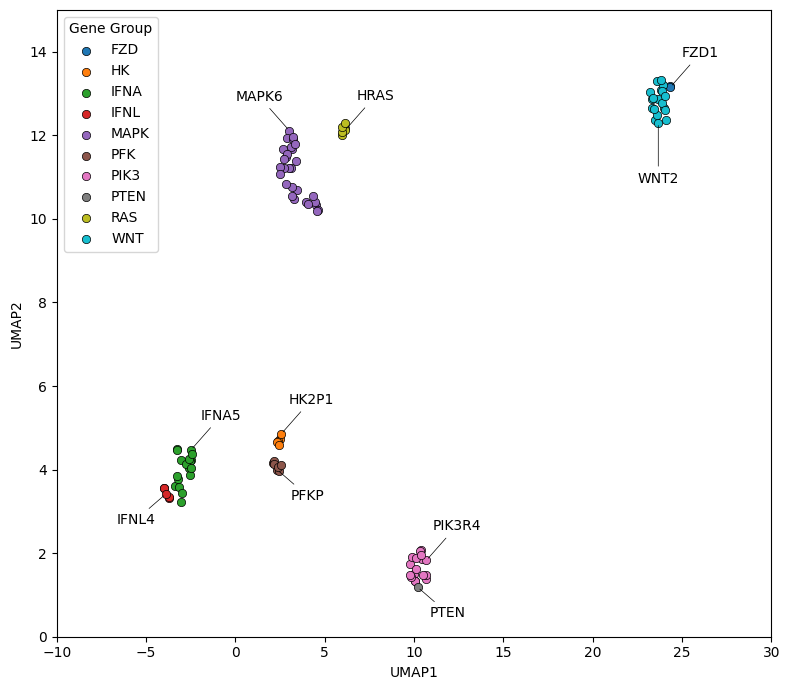

In [ ]:
import json
import pickle
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import textwrap

# json file can be downloaded from https://zenodo.org/records/10833191
sum_path = "/Users/pancake/Downloads/GenePT_emebdding_v2/NCBI_UniProt_summary_of_genes.json"
summary = json.load(open(sum_path, "r"))

embd_path = "../../data/Data_GeneEmbd/GenePT_V1.pickle"
embd_pkl = pickle.load(open(embd_path, "rb"))
embd = pd.DataFrame(embd_pkl).T
embd = embd[embd.index.isin(summary.keys())]
embd = pd.DataFrame(PCA(n_components=100, random_state=42).fit_transform(embd), index=embd.index)

gene_prefix = ["PIK3", "PTEN",
               "IFNA", "IFNL",
               "FZD1", "WNT",
               "HK", "PFK",
               "MAPK", "RAS"]

set1 = [k for k, v in summary.items() if k.startswith(gene_prefix[0]) and '-' not in k]
set2 = [k for k, v in summary.items() if k.endswith(gene_prefix[1]) and '-' not in k]
set3 = [k for k, v in summary.items() if k.startswith(gene_prefix[2]) and '-' not in k]
set4 = [k for k, v in summary.items() if k.startswith(gene_prefix[3]) and '-' not in k]
set5 = [k for k, v in summary.items() if k.startswith(gene_prefix[4]) and '-' not in k]
set6 = [k for k, v in summary.items() if k.startswith(gene_prefix[5]) and '-' not in k]
set7 = [k for k, v in summary.items() if k.startswith(gene_prefix[6]) and '-' not in k]
set8 = [k for k, v in summary.items() if k.startswith(gene_prefix[7]) and '-' not in k]
set9 = [k for k, v in summary.items() if k.startswith(gene_prefix[8]) and '-' not in k]
set10 = [k for k, v in summary.items() if k.endswith(gene_prefix[9]) and '-' not in k]

embd_set1 = embd.loc[set1].assign(set=gene_prefix[0])
embd_set2 = embd.loc[set2].assign(set=gene_prefix[1])
embd_set3 = embd.loc[set3].assign(set=gene_prefix[2])
embd_set4 = embd.loc[set4].assign(set=gene_prefix[3])
embd_set5 = embd.loc[set5].assign(set=gene_prefix[4])
embd_set6 = embd.loc[set6].assign(set=gene_prefix[5])
embd_set7 = embd.loc[set7].assign(set=gene_prefix[6])
embd_set8 = embd.loc[set8].assign(set=gene_prefix[7])
embd_set9 = embd.loc[set9].assign(set=gene_prefix[8])
embd_set10 = embd.loc[set10].assign(set=gene_prefix[9])
embd_set = pd.concat(
    [embd_set1, embd_set2, embd_set3, embd_set4, embd_set5, embd_set6, embd_set7, embd_set8, embd_set9, embd_set10]
) 


reducer = umap.UMAP(n_components=2, metric="cosine", random_state=1)
embedding = reducer.fit_transform(embd_set.drop(columns=["set"]).values)
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"], index=embd_set.index)
umap_df["Family"] = embd_set.set.astype('category')
umap_df['Family'] = umap_df['Family'].cat.rename_categories({'FZD1': 'FZD'})

plt.figure(figsize=(8,7))
for family in umap_df['Family'].cat.categories:
    mask = umap_df['Family'] == family
    plt.scatter(umap_df.loc[mask, 'UMAP1'], 
                umap_df.loc[mask, 'UMAP2'], 
                label=family, 
                edgecolors='black', 
                linewidth=0.5)

gene_list = {'MAPK6':(-30,30), 'HRAS':(30,30), 'HK2P1':(30,30), 'PFKP':(30,-30), 'IFNL4':(-30,-30), 
             'IFNA5':(30,30), 'PTEN':(30,-30), 'PIK3R4':(30,30), 'FZD1':(30,30), 'WNT2':(0, -60)}

for gene, loc in gene_list.items():
    if gene in umap_df.index:
        x, y = umap_df.loc[gene, ['UMAP1', 'UMAP2']]
        plt.annotate(gene, 
                     (x, y), 
                     textcoords="offset pixels", 
                     xytext=loc,
                     ha='center', 
                     arrowprops=dict(arrowstyle="-", lw=0.5))
plt.xlim(-10, 30)
plt.ylim(0, 15)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Gene Group')
plt.tight_layout()
plt.show()